In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
os.getcwd()
path='C:\\Users\\Dimitrios\\Documents\\Education\\ACG\\2023-2024\\courses-grad\\ITC6001\\Labs\\problems-wk4-Pandas\\2022-Pandas-Pivot'
os.chdir(path)

In [4]:
#titanic data
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Drop some columns to simplify our analysis
df.drop(['PassengerId','Ticket','Name','Fare','Cabin','Embarked'],inplace=True,axis=1)

In [6]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [9]:
#Grouping data using index in a Pivot Table  ???
#default aggreation function = np.mean
grouped1 = pd.pivot_table(data=df,index=['Sex'])
grouped1

,Age,Parch,Pclass,SibSp,Survived
Sex,,,,,
female,27.915709,0.649682,2.159236,0.694268,0.742038
male,30.726645,0.235702,2.389948,0.429809,0.188908


<AxesSubplot: xlabel='Sex'>

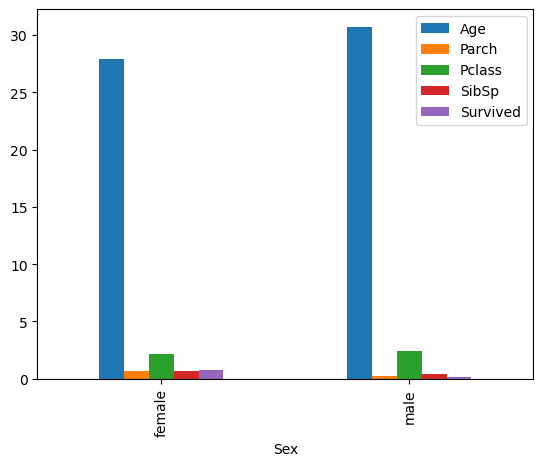

In [50]:
grouped1.plot(kind='bar')


In [53]:
grouped2 = pd.pivot_table(data=df,index=['Sex'],aggfunc=np.mean)
grouped2

,Age,Parch,Pclass,SibSp,Survived
Sex,,,,,
female,27.915709,0.649682,2.159236,0.694268,0.742038
male,30.726645,0.235702,2.389948,0.429809,0.188908


In [12]:
#Pivot Table with multi-index
grouped2 = pd.pivot_table(df,index=['Sex','Pclass'])
grouped2


Age     Parch     SibSp  Survived
Sex    Pclass                                         
female 1       34.611765  0.457447  0.553191  0.968085
       2       28.722973  0.605263  0.486842  0.921053
       3       21.750000  0.798611  0.895833  0.500000
male   1       41.281386  0.278689  0.311475  0.368852
       2       30.740707  0.222222  0.342593  0.157407
       3       26.507589  0.224784  0.498559  0.135447

In [14]:
#Now we apply aggfunc which accepts a function or list of functions you’d like to use on your group (default: np.mean)

grouped3 = pd.pivot_table(df,index=['Sex','Pclass'],aggfunc={'Age':np.mean,'Survived':np.sum})
grouped3


Age  Survived
Sex    Pclass                     
female 1       34.611765        91
       2       28.722973        70
       3       21.750000        72
male   1       41.281386        45
       2       30.740707        17
       3       26.507589        47

In [17]:
#You can define feature(s) to apply the aggregate function on by using value parameter.
grouped4 = pd.pivot_table(df,index=['Sex','Pclass'], values=['Survived', aggfunc=np.sum)
grouped4

SibSp  Survived
Sex    Pclass                 
female 1          52        91
       2          37        70
       3         129        72
male   1          38        45
       2          37        17
       3         173        47

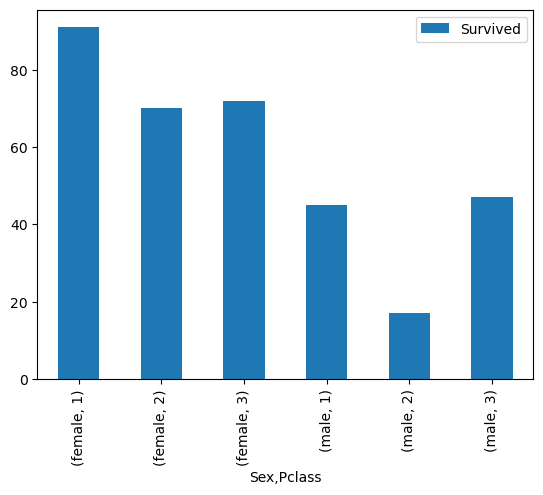

In [31]:
grouped4.plot(kind='bar');

In [63]:
#Use columns parameter
#Columns parameter can be used to find relationships between features.
#Columns parameter displays values horizontally on the top of the resultant table

grouped5 = pd.pivot_table(df,index=['Sex'],columns=['Pclass'],values=['Survived'],aggfunc=np.sum)
grouped5

Survived        
Pclass        1   2   3
Sex                    
female       91  70  72
male         45  17  47

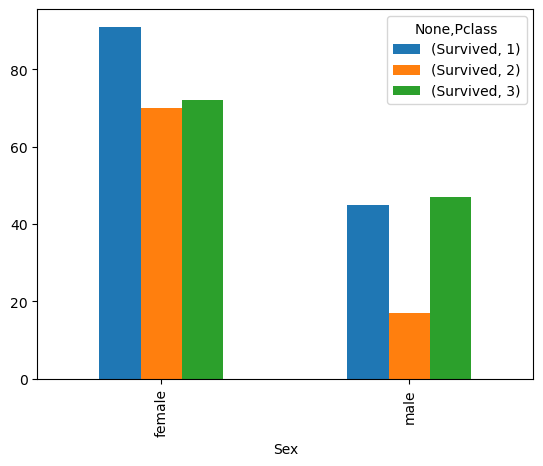

In [35]:
grouped5.plot(kind='bar');

In [37]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
#Drop some columns to simplify our analysis
df.drop(['PassengerId','Ticket','Name','Fare','Cabin'grouped7 = pd.pivot_table(df,index=['Sex','Survived','Pclass'],columns=['Embarked'],values=['Age'],aggfunc=np.mean,fill_value=np.mean(df['Age']))
grouped7],inplace=True,axis=1)

In [39]:
#Use columns parameter
#Columns parameter can be used to find relationships between features.
#Columns parameter displays values horizontally on the top of the resultant table
grouped6 = pd.pivot_table(df,index=['Sex','Survived','Pclass'],columns=['Embarked'],values=['Age'],aggfunc=np.mean)
grouped6



Age                      
Embarked                        C          Q          S
Sex    Survived Pclass                                 
female 0        1       50.000000        NaN  13.500000
                2             NaN        NaN  36.000000
                3       20.700000  28.100000  23.688889
       1        1       35.675676  33.000000  33.619048
                2       19.142857  30.000000  29.091667
                3       11.045455  17.600000  22.548387
male   0        1       43.050000  44.000000  45.362500
                2       29.500000  57.000000  33.414474
                3       27.555556  28.076923  27.168478
       1        1       36.437500        NaN  36.121667
                2        1.000000        NaN  17.095000
                3       18.488571  29.000000  22.933333

In [40]:
grouped7 = pd.pivot_table(df,index=['Sex','Survived','Pclass'],columns=['Embarked'],values=['Age'],aggfunc=np.mean,fill_value=np.mean(df['Age']))
grouped7

Age                      
Embarked                        C          Q          S
Sex    Survived Pclass                                 
female 0        1       50.000000  29.699118  13.500000
                2       29.699118  29.699118  36.000000
                3       20.700000  28.100000  23.688889
       1        1       35.675676  33.000000  33.619048
                2       19.142857  30.000000  29.091667
                3       11.045455  17.600000  22.548387
male   0        1       43.050000  44.000000  45.362500
                2       29.500000  57.000000  33.414474
                3       27.555556  28.076923  27.168478
       1        1       36.437500  29.699118  36.121667
                2        1.000000  29.699118  17.095000
                3       18.488571  29.000000  22.933333

In [42]:
pd.pivot_table(df,index=['Sex','Survived','Pclass'],pd.pivot_table(df,index=['Sex','Survived','Pclass'],columns=['Embarked'],values=['Age'],aggfunc=np.meanvalues=['Age'],aggfunc=np.mean)

Age
Sex    Survived Pclass           
female 0        1       25.666667
                2       36.000000
                3       23.818182
       1        1       34.939024
                2       28.080882
                3       19.329787
male   0        1       44.581967
                2       33.369048
                3       27.255814
       1        1       36.248000
                2       16.022000
                3       22.274211